In [1]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Rules:

#Q=cA
def rule1(dA,c):
    return c*dA

#Q=cA^m
def rule2(A,dA,m,c):
    return c*m*(A**(m-1))*dA

#Q=A+B or A-B
def rule3(dA,dB):
    dQ = np.sqrt(dA**2 + dB**2)
    return dQ

#Q=cA^mB^n
def rule4(Q,A,dA,m,B,dB,n):
    s = ((m*dA/A)**2)+((n*dB/B)**2)
    return Q*np.sqrt(s)

#Q=cA^mB^nC^o
def rule4plus(Q,A,dA,m,B,dB,n,C,dC,o):
    s = ((m*dA/A)**2)+((n*dB/B)**2)+((o*dC/C)**2)
    return Q*np.sqrt(s)


In [3]:
#measurements

voltages = [96.38,98.32,102.1,111.5,120.4]
radii=[.20,.43,.681,1.0,1.163]
N=5
dv=[]
dr=[]
E=[]
Eln=[]
rmid=[]

for i in range(N-1):
    dv.append(voltages[i+1]-voltages[i])
    dr.append(radii[i+1]-radii[i])
    rmid.append(np.log((radii[i]+radii[i+1])/2))
    E.append((dv[i]/dr[i]))
    Eln.append(np.log(E[i]))



In [4]:
#Error calculations

deltaV=.5;deltar=.005;
ddV=rule3(deltaV,deltaV);ddr=rule3(deltar,deltar)
dE=[];dEln=[]
for i in range(N-1):
    dE.append(rule4(E[i],dv[i],ddV,1,dr[i],ddr,-1))
    dEln.append(np.log((E[i]+dE[i]))-np.log(E[i]))
    

the slope is approximately 1.3143281138996836


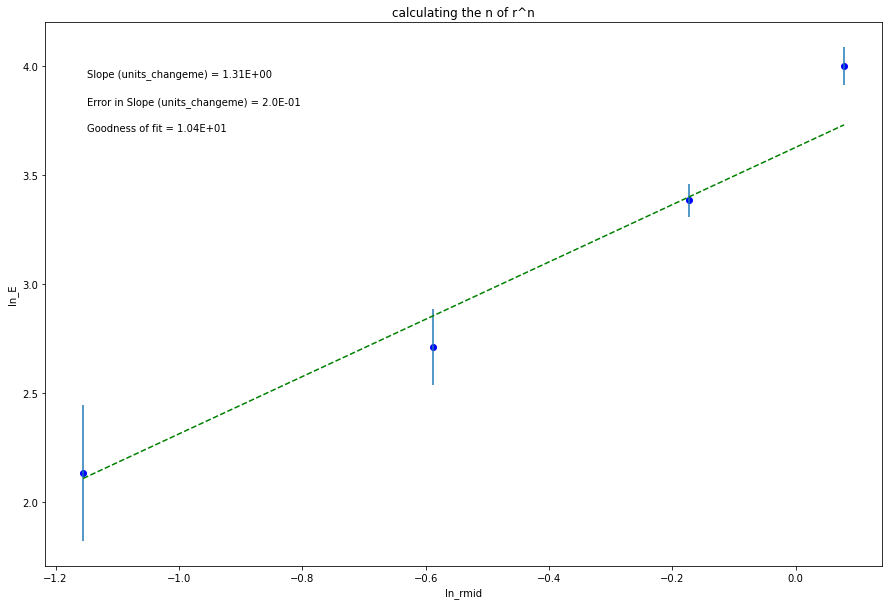

In [5]:


#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
ln_rmid = np.array(rmid) #what are units?
ln_E = np.array(Eln) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_ln_E = np.array(dEln)


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = ln_rmid   #this should be the array you want to plot on the x axis
y = ln_E
dy = err_ln_E  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

print("the slope is approximately " + str(m))
#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln_rmid')
plt.ylabel('ln_E')
plt.title('calculating the n of r^n')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
